#### <a href="https://colab.research.google.com/github/PacktPublishing/Modern-Computer-Vision-with-PyTorch-2E/blob/main/Chapter01/Back_propagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3>Modern Computer Vision with Pytorch: Chaper 1 - Fundamentals of Artificial Neural Networks</h3>

Note: The code in this notebook follows the code in  the Packt publication "Modern Computer Vision with PyTorch - 2E." However, some of the text and figures come from additional sources. Outside figures are denoted by the letter 'O' followed by '-#' (e.g. Figure O-1).

The declarations shown below are used throughout the notebook. They've been posted in one place to ensure that they are not duplicated or overlooked:

In [1]:
# Import matplotlib, numpy and math 
import numpy as np 
import math 
import matplotlib.pyplot as plt
from copy import deepcopy

<h4>Propagation Models</h4>

The first section of Ch.1 introduces the concept of an artificial neural network (ANN). Generally speaking, ann ANN is a computational model inspired by the way biological neural networks in the human brain process information. ANNs are used in machine learning and artificial intelligence to recognize patterns, learn from data, and make decisions. More formally, an ANN is:

<blockquote>
... a network of artificial neurons or nodes organized in layers, which are connected by weighted links. The network processes inputs and generates outputs through a series of transformations facilitated by these connections and the neurons' activation functions.
</blockquote>

The general structure of an ANN can be represented diagrammatically in the following way:

<img src="http://localhost:8888/tree/book-code-modern-computer-vision-with-pytorch-Packt-jupyter/book_images/General_ANN_Structure_3.jpg" width="330" height="170" align="left"/>
<p style="clear:left">Figure O-1: A General ANN Network</p>
<p></p>

where the:

<ol>
  <li>Circles: Neurons (of various sorts) which are the computation units of the system.           </li>
  <li>Layers: Vertically organized groups of neurons including:</li>
      <ul>
         <li>Input Layer: These layers take the independent variables as input. In a predictive maintenance model these might be sensor values, in a natural language proessing models these might be particular words, and in object detection model these might be particular pixel values (e.g. intensity).</li>
         <li>Hidden Layers: These layers connect the input and output layers while performing
transformations on top of input data. Furthermore, the hidden layers contain nodes (units/
circles in the following diagram) to modify their input values into higher-/lower-dimensional
values. The functionality to achieve a more complex representation is achieved by using various
activation functions that modify the values of the nodes of intermediate layers. In deep learning there can be hundreds, thousands or even millions of hidden layers.</li>
        <li>Output Layer: These are the values generated when the input variable values are passed through the network. The values of the output values will depend in large part on the particular problem of interest. In the case of a predictive maintenance model, the could be the predicted state of a machine (on, off), for an NLP model it might be the probability of the next word in a sequence of words, and in an object detection model it might be the location of an object in an image.</li>
     </ul>
<li>Connections (Edges): Weighted links between neurons, representing the strength of influence one neuron has on another.</li>
<li>Weights: Parameters that adjust during learning to minimize the error of the network's predictions.</li>
</ol>

A very simple (toy) example of an ANN is shown below. This is a 'feedforward' network that has two input values (x1 and x2), one hidden layer with three neurons (h), one output value (y), a set of weights (w), and a set of arrows all pointing in one direction from input to output.

<img src="http://localhost:8888/tree/book-code-modern-computer-vision-with-pytorch-Packt-jupyter/book_images/Simple_Feedforward_Network.jpg" width="310" height="230" align="left"/>
<p style="clear:left">Figure 1.9A: Simple (Feedforward) Network</p>
<p></p>

In structures of this sort, we generally start with values for the inputs and outputs and, given these values, aim is to determine weight values that will produce output values with minimum error. The values of the neurons or nodes in the hidden layer will be determined computationally by the type of network we're trying to construct.

To see how the process would work with this particular feedforward model, let's begin with a network that has the following input and output values:

<img src="http://localhost:8888/tree/book-code-modern-computer-vision-with-pytorch-Packt-jupyter/book_images/Simple_FeedForward_Starting_Values.jpg" width="310" height="230" align="left"/>
<p style="clear:left">Figure 1.8: Sample neural network architecture with 1 hidden layer</p>
<p></p>

The input values are both '1' and there is only one output value equal to '0'. So, the goal is to find weights that produce an output value that is as close to 0 as possible. The entire process of finding the weights and determining the associated error is known as 'training the AI/ML model.' In this example the process will include the following steps:

<ul>
    <li>Calculating Hidden Layer Values</li>
    <li>Performing Non-linear Activations</li>
    <li>Estimating the Output Layer Value</li>
    <li>Calculating the Loss Value corresponding to the Expected Value</li>
</ul>

<h4>Calculating the Hidden Layer Values</h4>

In the first step for this model, we're going to assign weights randomly across all the connections. Below is a set of 9 randomly assigned values, one for each of the connections (arrows) in the network.

<img src="http://localhost:8888/tree/book-code-modern-computer-vision-with-pytorch-Packt-jupyter/book_images/Simple_Feedforward_Network_Values.jpg" width="310" height="230" align="left"/>
<p style="clear:left">Figure 1.9B: Randomly Assigned Weight (in and out of Hidden Layer)</p>
<p></p>

The general formula we use for calculating the value for each of the neurons (nodes) in the model's hidden layer looks like this:

<img src="http://localhost:8888/tree/book-code-modern-computer-vision-with-pytorch-Packt-jupyter/book_images/ANN_Equations.jpg" width="150" height="60" align="left"/>
<p style="clear:left">Figure 1.9C: Equations for Simple (Feedforward) Network with Values</p>
<p></p>

Substituting the randomly assigned weights for the connections between the inputs and hidden layer (and ignoring the bias factor w0) yields the following:

<img src="http://localhost:8888/tree/book-code-modern-computer-vision-with-pytorch-Packt-jupyter/book_images/Feedforward_Equations.jpg" width="310" height="230" align="left"/>
<p style="clear:left">Figure 1.9C: Equations for Simple (Feedforward) Network with Values</p>
<p></p>

We can perform this calculation in a straightforward fashion using numpy arrays and numpy matrix multiplication (matmul or dot)

In [2]:
# Calculating the 'h' values for the hidden layer nodes
# by multiplying the x matrix of input values with the
# W values for the associated weights connection x to the hidden layer
# x inputs

x = np.array([[1,1]])
x_rows, x_cols = x.shape
print('Inputs:')
print(f'x.shape: {x_rows} rows by {x_cols} columns matrix')
print(f'{x}\n')

# W weights connecting x to h
W = np.array([[0.8, 0.4, 0.3],[0.2, 0.9, 0.5]])
W_rows, W_cols = W.shape
print('Weights:')
print(f'W.shape: {W_rows} rows by {W_cols} columns matrix')
print(f'{W}\n')

# results
h = np.matmul(x , W) # or alternatively h = np.matmul(W.T,x)
h_rows, h_cols = h.shape
print('Result is:')
print(f'shape: {h_rows} rows by {h_cols} columns')
print(f'{h}')

# or as an alternative we can use np.dot
# h2 = np.dot(x,W)


Inputs:
x.shape: 1 rows by 2 columns matrix
[[1 1]]

Weights:
W.shape: 2 rows by 3 columns matrix
[[0.8 0.4 0.3]
 [0.2 0.9 0.5]]

Result is:
shape: 1 rows by 3 columns
[[1.  1.3 0.8]]


So, before activation the model looks like this:

<img src="http://localhost:8888/tree/book-code-modern-computer-vision-with-pytorch-Packt-jupyter/book_images/Hidden_Layer_Computed_Values.jpg" width="310" height="230" align="left"/>
<p style="clear:left">Figure 1.10: Hidden Layer Values Before Activation</p>
<p></p>

Because we've used random values for the weights, the estimated output value that results from treating this as a linear process (without activation) can be calculated by multiplying the h values we just calculated by the associated weights that exist between h and the output y:

   y_est = 1.0 * 0.3 + 1.30 * 0.5 + 0.8 * 0.9 = 1.67

which is quite different than y's actual value of '0'.

Again, we can perform the math using numpy arrays and matrix multiplication, although the scalar value has to be extracted from the resulting numpy array after we do the multiplication

In [3]:
# h is a 1x3 np.array([[1.0, 1.3, 0.8]])
# so we need to transpose the 1x3 W_h array to a 3x1 array in order to 
# carry out the matrix multiplication which will result in a 1x1 array

W_h = np.array([[0.3, 0.5, 0.9]])
y_est_array = np.matmul(h,W_h.T)
y_est_array_rows, y_est_array_cols = y_est_array.shape
print('Estimated y value:')
print(f'y_est_array.shape: {y_est_array_rows} rows by {y_est_array_cols} columns matrix')
print(f'y_est_array = {y_est_array}\n')

print('To obtain the scalar value we extract the scalar value using y_est_array[0,0]:')
y_est = y_est_array[0,0]
print(f'y_est = {y_est}')

Estimated y value:
y_est_array.shape: 1 rows by 1 columns matrix
y_est_array = [[1.67]]

To obtain the scalar value we extract the scalar value using y_est_array[0,0]:
y_est = 1.67


In order to improve our estimates, we generally apply an activation formula to the hidden-layer values. This is where the 'a' values shown in Figure 1.9A come into play. 

<h4>Performing Non-linear Activations</h4>

In machine learning, an activation function is a mathematical function applied to the output of a neuron in an artificial neural network. The primary functions of an activation function are to:
<ul>
    <li>Introduce Non-Linearity: Activation functions enable the network to learn and model complex patterns by introducing non-linearities into the model. Without non-linearity, no matter how many layers the network has, it would behave like a single-layer perceptron, which can only model linear relationships.</li>
    <li>Transform the Weighted Sum: The activation function transforms the weighted sum of the input signals into an output signal for the neuron. This transformed output can then be passed to the next layer in the network or used as the final output.</li>
    <li>Control the Output Range: Different activation functions can control the range of the output, which can be helpful in different contexts. For example, a sigmoid activation function outputs values between 0 and 1 and a Tanh activation function outputs values between -1 and 1 (see the graphs below).
</ul>

Some commonly used activation functions include:

<img src="http://localhost:8888/tree/book-code-modern-computer-vision-with-pytorch-Packt-jupyter/book_images/Activation_Functions.jpg" width="310" height="230" align="left"/>
<p style="clear:left">Figure 1.11A: Activation Functions</p>
<p></p>

These can be visualized in the following manner:

<img src="http://localhost:8888/tree/book-code-modern-computer-vision-with-pytorch-Packt-jupyter/book_images/Outputs_Activation_Functions.jpg" width="600" height="450" align="left"/>
<p style="clear:left">Figure 1.11B:Outputs of Activation Functions</p>
<p></p>

The following code provides a set of functions for generating the graphs of the activation functions shown above in Figure 1.11B.

In [4]:
# defining the activiation functions
# in numpy the constant 'e' is programmed using 'np.exp' 

def sigmoid(x):
    return(1/(1 + np.exp(-x)))

def relu(x):
    return np.where(x>0,x,0)

#def relu(x): alternative function
#    return np.maximum(0, x)

def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

def linear(x):
    return x

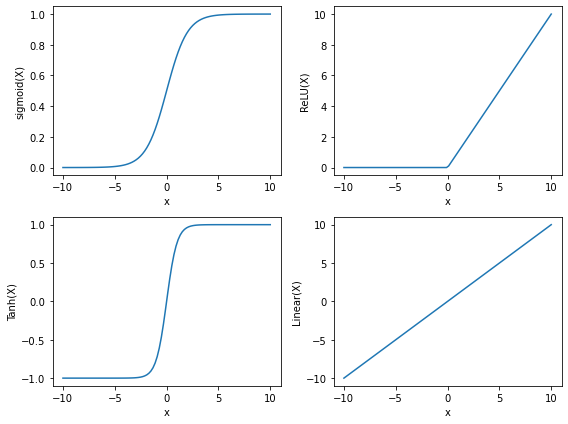

In [5]:
# plotting activation functions

x_plot = np.linspace(-10, 10, 100)

plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
plt.plot(x_plot, sigmoid(x_plot)) 
plt.xlabel("x") 
plt.ylabel("sigmoid(X)") 

plt.subplot(2,2,2)
plt.plot(x_plot, relu(x_plot)) 
plt.xlabel("x") 
plt.ylabel("ReLU(X)")

plt.subplot(2,2,3)
plt.plot(x_plot, tanh(x_plot)) 
plt.xlabel("x") 
plt.ylabel("Tanh(X)")

plt.subplot(2,2,4)
plt.plot(x_plot, linear(x_plot)) 
plt.xlabel("x") 
plt.ylabel("Linear(X)")

plt.tight_layout();
plt.show() 

<h4>Estimating the Hidden Layer Values with an Activation Function</h4>

To see the impact of using an activation function instead of using a simple linear model, let's first use the sigmoid activation function to adjust our hidden layer weights. Then carry out the feedforward process.

In [6]:
# The sigmoid activation function is applied
# to each of the 'h' values in the hidden layer in order
# to yield the 'a' values also in the hidden layer (shown earlier in Figure 1.9A)
# When applied the end result is essentially an numpy vector with (3,) elements.
# For matmul this vector needs to be resphaped into either a 1x3 or 3x1 array

h = np.array(([1.0, 1.3, 0.9]))
h_sig = np.array([[]]) #an array for storing the 'a' results from applying activation function

for hv in h: h_sig = np.append(h_sig, sigmoid(hv))
print(f'h_sig.shape = {h_sig.shape} and h_sig_array = {h_sig}\n')

a = np.array(h_sig.reshape((1, 3)))
print(f'a.shape = {a.shape} and a = {a}')


h_sig.shape = (3,) and h_sig_array = [0.73105858 0.78583498 0.7109495 ]

a.shape = (1, 3) and a = [[0.73105858 0.78583498 0.7109495 ]]


In [7]:
# so to obtain the new estimate based on the sigmoid values 'a'
# we simply use numpy matrix multiplication to multiply 'a' values with
# original hidden layer weights W_h = np.array([[0.3, 0.5, 0.9]])

# new estimate
y_est_array = np.dot(a, W_h.T)
y_est_array_rows, y_est_array_cols = y_est_array.shape

print('Estimated y value using :')
print(f'y_est_array.shape: {y_est_array_rows} rows by {y_est_array_cols} columns matrix')
print(f'y_est_array = {y_est_array}\n')

print('To obtain the estimated y value we extract the scalar value y_est using y_est_array[0,0]:')
y_est = y_est_array[0,0]
print(f'y_est = {y_est:0.3}')

Estimated y value using :
y_est_array.shape: 1 rows by 1 columns matrix
y_est_array = [[1.25208962]]

To obtain the estimated y value we extract the scalar value y_est using y_est_array[0,0]:
y_est = 1.25


By applying the sigmoid 'activation' function the y_est has improved marginally from 1.67 to 1.25. However, that's still considerable different than the actual y value of '0'.

<h4>Forward Progation Function - Generalizing the Process</h4>

The preceding discussion and code treated forward propagation as a series of interrelated but disjoint steps. Additionally, there was no attempt to include the bias effects on the hidden or output values. The functions that follow incorporate all the elements. 

In [8]:
# here the inputs are the array of x values, the array of output values y, and
# the weights which include the initial weights

def feed_forward(inputs, outputs, weights):
    pre_hidden = np.dot(inputs,weights[0]) + weights[1]
    hidden = 1/(1+np.exp(-pre_hidden)) #sigmoid activation
    out = np.dot(hidden, weights[2]) + weights[3]
    mean_squared_error = np.mean(np.square(out - outputs))
    return mean_squared_error

In [9]:
# 'lr' stands for the learning rate
def update_weights(inputs, outputs, weights, lr):
    original_weights = deepcopy(weights)
    temp_weights = deepcopy(weights)
    updated_weights = deepcopy(weights)
    original_loss = feed_forward(inputs, outputs, original_weights)
    for i, layer in enumerate(original_weights):
        for index, weight in np.ndenumerate(layer):
            temp_weights = deepcopy(weights)
            temp_weights[i][index] += 0.0001
            _loss_plus = feed_forward(inputs, outputs, temp_weights)
            grad = (_loss_plus - original_loss)/(0.0001)
            updated_weights[i][index] -= grad*lr
    return updated_weights, original_loss

In [10]:
# Establish Values

x = np.array([[1,1]]) # original input
y = np.array([[0]]) # original output

# W ~ weights - all of dtype np.float32; '.T' is the transpose operator
# W[0] - weights connecting input layer to hidden layer
# W[1] - weights representing bias values associated with hidden layer
# W[2] - weights joining the hidden layer to the output layer 
# W[3] - weights representing the bias associated with the output layer

W = [
    np.array([[-0.0053, 0.3793],
              [-0.5820, -0.5204],
              [-0.2723, 0.1896]], dtype=np.float32).T, 
    np.array([-0.0140, 0.5607, -0.0628], dtype=np.float32), 
    np.array([[ 0.1528, -0.1745, -0.1135]], dtype=np.float32).T, 
    np.array([-0.5516], dtype=np.float32)
]

y = np.array([[0]]) #original output

print('w0',W[0].shape,W[0],'\n')
print('w1',W[1].shape,W[1],'\n')
print('w2',W[2].shape,W[2],'\n')
print('w3',W[3].shape,W[3],'\n')
print('x',x.shape,x,'\n')
print('y',y.shape,y,'\n')

w0 (2, 3) [[-0.0053 -0.582  -0.2723]
 [ 0.3793 -0.5204  0.1896]] 

w1 (3,) [-0.014   0.5607 -0.0628] 

w2 (3, 1) [[ 0.1528]
 [-0.1745]
 [-0.1135]] 

w3 (1,) [-0.5516] 

x (1, 2) [[1 1]] 

y (1, 1) [[0]] 



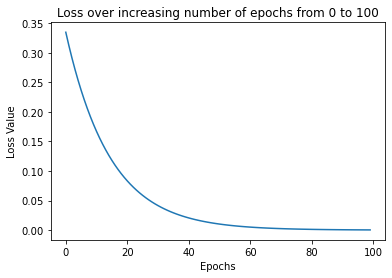

In [11]:
# plot the loss value by epoch

losses = []

for epoch in range(100):
    W, loss = update_weights(x,y,W,0.01)
    losses.append(loss)
    
plt.plot(losses)
plt.title('Loss over increasing number of epochs from 0 to 100')
plt.xlabel('Epochs')
plt.ylabel('Loss Value'); # the ';' stops any ancillary printing besides the plot

If we want to see the exact values of the weights (W) and loss at the end of the 100 epochs, we can simply print the current value of weights (W) and loss (which are the last values obtained). Or, in the case of the final loss, we can also see this by looking at the last value in the 'losses' list.

In [12]:
print('Weights at the end of 100 epochs:')
print(W,'\n')
print('Loss at the end of 100 epochs:')
print(loss,'\n')
print('or losses[99]', losses[99])

Weights at the end of 100 epochs:
[array([[ 0.01424004, -0.5907864 , -0.27549535],
       [ 0.39883757, -0.52918637,  0.18640439]], dtype=float32), array([ 0.00554004,  0.5519136 , -0.06599568], dtype=float32), array([[ 0.3475135 ],
       [-0.05529078],
       [ 0.03760847]], dtype=float32), array([-0.22443289], dtype=float32)] 

Loss at the end of 100 epochs:
0.0003277067302998909 

or losses[99] 0.0003277067302998909


Similarly, if we want to calculate the loss at the end, we could take the last value of the Weights and use these to calculate the loss:

In [13]:
pre_hidden = np.dot(x, W[0]) + W[1]
hidden = 1/(1+np.exp(-pre_hidden))
pred_out = np.dot(hidden, W[2]) + W[3]
print(f'pred_out: {pred_out[0,0]:0.3}')

pred_out: -0.0175


<h4>Understanding the Impact of Learning Rate</h4>

Consider a simple linear equation : y = 3 * x. Here, we're given a set of input and and expected output values and the task is to derive an equation that describes the relationship. Behind the scenes we want to see what the impact of various learning rates will be on the estimate.

We begin with the initial input and out values. From these values it's clear that y is 3 * x.

In [14]:
# initial input and output values.

x = [[1],[2],[3],[4]]
y = [[3],[6],[9],[12]]

To carry out this analysis we need to modify both the feed_forward and update_weights functions.

In [15]:
from copy import deepcopy
import numpy as np
def feed_forward(inputs, outputs, weights):
    out = np.dot(inputs,weights[0])+ weights[1]
    mean_squared_error = np.mean(np.square(out - outputs))
    return mean_squared_error

In [16]:
def update_weights(inputs, outputs, weights, lr):
    original_weights = deepcopy(weights)
    org_loss = feed_forward(inputs, outputs, original_weights)
    updated_weights = deepcopy(weights)
    for i, layer in enumerate(original_weights):
        for index, weight in np.ndenumerate(layer):
            temp_weights = deepcopy(weights)
            temp_weights[i][index] += 0.0001
            _loss_plus = feed_forward(inputs, outputs, temp_weights)
            grad = (_loss_plus - org_loss)/(0.0001)
            updated_weights[i][index] -= grad*lr
    return updated_weights, org_loss

Now, let's see the results for 1000 epochs and a learning rate of 0.01.

In [17]:
W = [np.array([[0]], dtype=np.float32), np.array([[0]], dtype=np.float32)]

weight_value = []
for epx in range(1000):
    W, loss = update_weights(x,y,W,0.01)
    weight_value.append(W[0][0][0])

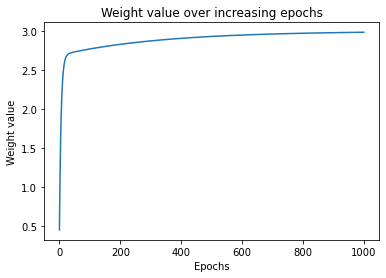

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(weight_value)
plt.title('Weight value over increasing epochs')
plt.xlabel('Epochs')
plt.ylabel('Weight value');

With this set up, we can see that after ~50 epochs the weighted value moves toward 2.7 and then slowly converges t0 3.0 over the remaining ~950 epochs.

Compare this with a learning rate of 0.1.

In [19]:
W = [np.array([[0]], dtype=np.float32), np.array([[0]], dtype=np.float32)]
weight_value = []
for epx in range(1000):
    W, loss = update_weights(x,y,W,0.1)
    weight_value.append(W[0][0][0])

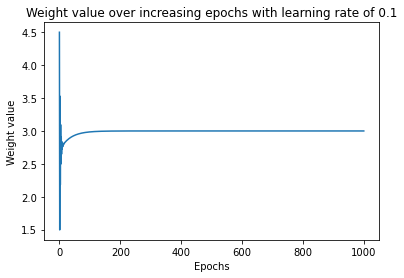

In [20]:
#import matplotlib.pyplot as plt
#%matplotlib inline
plt.plot(weight_value)
plt.title('Weight value over increasing epochs with learning rate of 0.1')
plt.xlabel('Epochs')
plt.ylabel('Weight value');

This time is rapidly oscillates between the values of 1.5 and 4.5, then it immediately settles on ~2.75, and quickly converges within ~100 epochs to 3.0.

Now, if we go in the other direction and set the learning rate to 1.0, then this is what transpires:

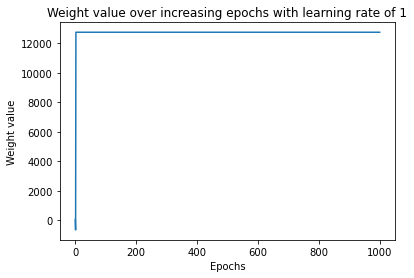

In [21]:
W = [np.array([[0]], dtype=np.float32), np.array([[0]], dtype=np.float32)]
weight_value = []
for epx in range(1000):
    W, loss = update_weights(x,y,W,1)
    weight_value.append(W[0][0][0])
#import matplotlib.pyplot as plt
#%matplotlib inline
plt.plot(weight_value)
plt.title('Weight value over increasing epochs with learning rate of 1')
plt.xlabel('Epochs')
plt.ylabel('Weight value');

Obviously, it immediately jumps to a value of ~13000 and stays there.

To get a better view of what's happening to the weight, let's look at the impact of a learning rate of .01 to .1 (eliminating 1.0) on the convergence process. In this instance instead of using 1000 epochs let's use 10 epochs instead. Additionally, we'll modify the update-weights function to print and plot both the weight values and loss for these epochs.

In [22]:
def update_weights_print(inputs, outputs, weights, lr):
    original_weights = deepcopy(weights)
    org_loss = feed_forward(inputs, outputs, original_weights)
    updated_weights = deepcopy(weights)
    for i, layer in enumerate(original_weights):
        for index, weight in np.ndenumerate(layer):
            temp_weights = deepcopy(weights)
            temp_weights[i][index] += 0.0001
            _loss_plus = feed_forward(inputs, outputs, temp_weights)
            grad = (_loss_plus - org_loss)/(0.0001)
            updated_weights[i][index] -= grad*lr
            if(i % 2 == 0):
                print('weight value:', np.round(original_weights[i][index],2), 
                      'original loss:', np.round(org_loss,2), 
                      'loss_plus:', np.round(_loss_plus,2), 
                      'gradient:', np.round(grad,2), 
                      'updated_weights:', np.round(updated_weights[i][index],2))
    return updated_weights, org_loss

In [23]:
W = [np.array([[0]], dtype=np.float32), np.array([[0]], dtype=np.float32)]
weight_value = []
loss_value = []
for epx in range(10):
    W, loss = update_weights_print(x,y,W,0.01)
    weight_value.append(W[0][0][0])
    loss_value.append(loss)

weight value: 0.0 original loss: 67.5 loss_plus: 67.5 gradient: -45.0 updated_weights: 0.45
weight value: 0.45 original loss: 46.88 loss_plus: 46.88 gradient: -37.49 updated_weights: 0.82
weight value: 0.82 original loss: 32.57 loss_plus: 32.57 gradient: -31.26 updated_weights: 1.14
weight value: 1.14 original loss: 22.64 loss_plus: 22.64 gradient: -26.05 updated_weights: 1.4
weight value: 1.4 original loss: 15.75 loss_plus: 15.75 gradient: -21.72 updated_weights: 1.62
weight value: 1.62 original loss: 10.97 loss_plus: 10.97 gradient: -18.1 updated_weights: 1.8
weight value: 1.8 original loss: 7.65 loss_plus: 7.65 gradient: -15.09 updated_weights: 1.95
weight value: 1.95 original loss: 5.35 loss_plus: 5.35 gradient: -12.59 updated_weights: 2.07
weight value: 2.07 original loss: 3.75 loss_plus: 3.75 gradient: -10.49 updated_weights: 2.18
weight value: 2.18 original loss: 2.64 loss_plus: 2.64 gradient: -8.75 updated_weights: 2.27


In [24]:
#import matplotlib.pyplot as plt
#%matplotlib inline

def plot_results(epochs, weight_value, loss_value, lr):
    plt.figure(figsize=(15,5))

    plt.subplot(121)
    epochs = np.arange(1,11)
    plt.plot(epochs, weight_value)
    plt.title(f'Weight value over increasing epochs \n when learning rate is: {lr}')
    plt.xlabel('Epochs')
    plt.ylabel('Weight value')

    plt.subplot(122)
    epochs = np.arange(1,11)
    plt.plot(epochs, loss_value)
    plt.title('Loss value over increasing epochs \n when learning rate is: {lr}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss value');


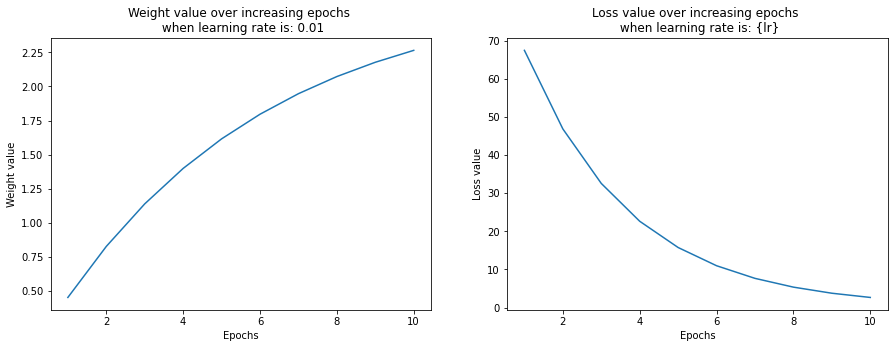

In [25]:
plot_results(10, weight_value, loss_value, .01)

Now for a learn rate of 0.1:

In [26]:
W = [np.array([[0]], dtype=np.float32), np.array([[0]], dtype=np.float32)]
weight_value = []
loss_value = []
for epx in range(10):
    W, loss = update_weights_print(x,y,W,0.1)
    weight_value.append(W[0][0][0])
    loss_value.append(loss)

weight value: 0.0 original loss: 67.5 loss_plus: 67.5 gradient: -45.0 updated_weights: 4.5
weight value: 4.5 original loss: 30.37 loss_plus: 30.38 gradient: 30.04 updated_weights: 1.5
weight value: 1.5 original loss: 13.79 loss_plus: 13.78 gradient: -20.31 updated_weights: 3.53
weight value: 3.53 original loss: 6.25 loss_plus: 6.26 gradient: 13.46 updated_weights: 2.18
weight value: 2.18 original loss: 2.85 loss_plus: 2.85 gradient: -9.14 updated_weights: 3.1
weight value: 3.1 original loss: 1.33 loss_plus: 1.33 gradient: 5.97 updated_weights: 2.5
weight value: 2.5 original loss: 0.65 loss_plus: 0.65 gradient: -4.12 updated_weights: 2.91
weight value: 2.91 original loss: 0.34 loss_plus: 0.34 gradient: 2.63 updated_weights: 2.65
weight value: 2.65 original loss: 0.2 loss_plus: 0.2 gradient: -1.88 updated_weights: 2.84
weight value: 2.84 original loss: 0.13 loss_plus: 0.13 gradient: 1.14 updated_weights: 2.72


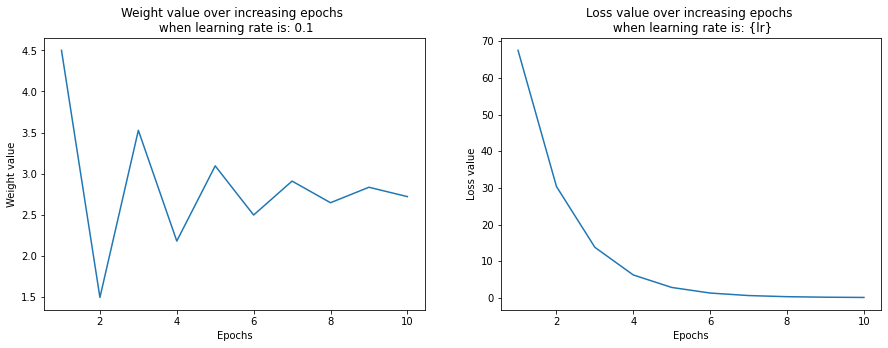

In [27]:
plot_results(10, weight_value, loss_value, .1)

Finally, for a learn rate of 1.0:

In [28]:
W = [np.array([[0]], dtype=np.float32), np.array([[0]], dtype=np.float32)]
weight_value = []
loss_value = []
for epx in range(10):
    W, loss = update_weights_print(x,y,W,1.0)
    weight_value.append(W[0][0][0])
    loss_value.append(loss)

weight value: 0.0 original loss: 67.5 loss_plus: 67.5 gradient: -45.0 updated_weights: 45.0
weight value: 45.0 original loss: 16604.45 loss_plus: 16604.52 gradient: 699.22 updated_weights: -654.22
weight value: -654.22 original loss: 4030779.1 loss_plus: 4030777.76 gradient: -13409.38 updated_weights: 12755.16
weight value: 12755.16 original loss: 1473935827.59 loss_plus: 1473935827.59 gradient: 0.0 updated_weights: 12755.16
weight value: 12755.16 original loss: 1473935827.59 loss_plus: 1473935827.59 gradient: 0.0 updated_weights: 12755.16
weight value: 12755.16 original loss: 1473935827.59 loss_plus: 1473935827.59 gradient: 0.0 updated_weights: 12755.16
weight value: 12755.16 original loss: 1473935827.59 loss_plus: 1473935827.59 gradient: 0.0 updated_weights: 12755.16
weight value: 12755.16 original loss: 1473935827.59 loss_plus: 1473935827.59 gradient: 0.0 updated_weights: 12755.16
weight value: 12755.16 original loss: 1473935827.59 loss_plus: 1473935827.59 gradient: 0.0 updated_weig

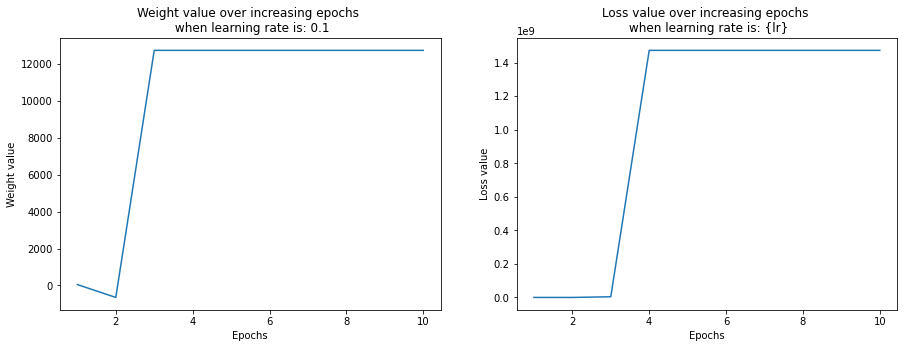

In [29]:
plot_results(10, weight_value, loss_value, .1)

These results are based on a simple model. However, in general it is "better to have a low learning rate. This way, the model is able to learn slowly but will adjust the weights toward an optimal value. Typical learning rate parameter values range between 0.00001 and 0.01."